### installations 
command line 

- conda activate bermar21 
- conda install -c anaconda pymysql 
- conda install -c anaconda sqlalchemy

### connecting to mysql from python 

In [ ]:
import pymysql 
import pandas as pd 
from sqlalchemy import create_engine 
import pandas as pd 


In [ ]:
import getpass # to get the password without it being visible 
password= getpass.getpass()

In [6]:
#define a connection string 
# dialect + driver :// username : password @host : db name 

connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine= create_engine(connection_string)

In [10]:
# dataframe creation 

df= pd.read_sql_query('Select * from loan', engine )

In [11]:
df

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348.0,C
678,5221,1284,981205,52512,12,4376.0,C
679,6402,6922,981206,139488,24,5812.0,C
680,5346,1928,981206,55632,24,2318.0,C


In [12]:
dloans=pd.read_sql_query('select d.A2 as district, sum(l.amount) as totamntbor, round(avg(l.amount)) as avgloan, count(l.loan_id) as noloans from loan l join account a on l.account_id = a.account_id  join district d on a.district_id= d.A1 group by d.A2 order by avgloan desc limit 20',engine)

In [13]:
dloans.head()

,district,totamntbor,avgloan,noloans
0,Nachod,1768380.0,294730.0,6
1,Ceske Budejovice,2010924.0,251366.0,8
2,Beroun,1460796.0,243466.0,6
3,Jesenik,1938432.0,242304.0,8
4,Kutna Hora,2095980.0,232887.0,9


In [14]:
dloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    20 non-null     object 
 1   totamntbor  20 non-null     float64
 2   avgloan     20 non-null     float64
 3   noloans     20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


## next - visualisation!

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 



<AxesSubplot:>

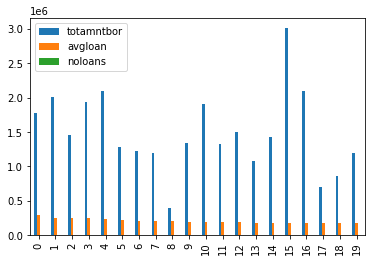

In [17]:
plotdata= dloans
plotdata.plot(kind="bar")

<AxesSubplot:xlabel='totamntbor', ylabel='avgloan'>

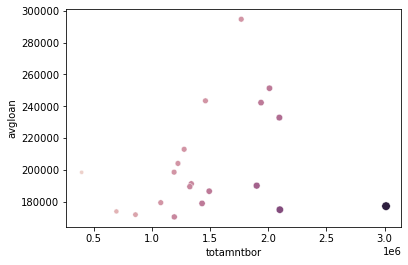

In [19]:
#Q: whats the relationship between no of loans, size of loans per district ? 
sns.scatterplot(x='totamntbor', y= 'avgloan', hue ='noloans', size = 'noloans', legend = 0, data = dloans)

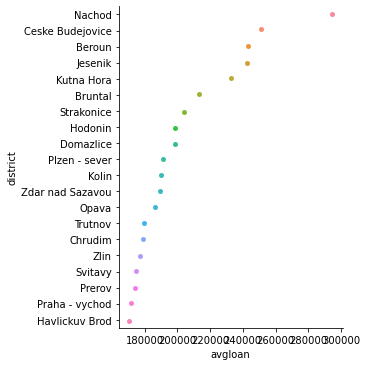

In [21]:
sns.catplot(y="district", x="avgloan", data=dloans)

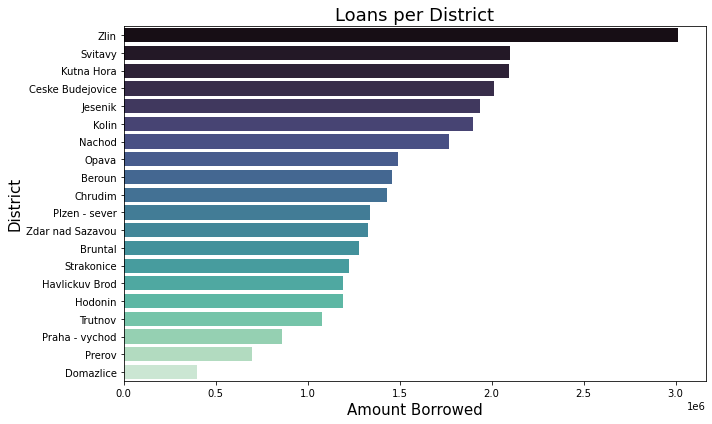

In [24]:
#Q: in which district have we lent the most ? 

plt.figure(figsize=(10,6))
sns_plot = sns.barplot(y='district',x ='totamntbor', data = dloans, palette = "mako", order=dloans.sort_values('totamntbor', ascending = False).district)
# set labels
plt.xlabel("Amount Borrowed", size=15)
plt.ylabel("District", size=15)
plt.title("Loans per District", size=18)
plt.tight_layout()

#export image 
plt.savefig("loansdistrict.png", dpi=100)